In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# I scream, you scream, we all scream for ice cream and shark attacks
---

Tonight we'll be looking at Ice Cream, Fudge, and Sharks—cool!

In [2]:
tbl = Table.read_table("ice-cream-stats.csv")
tbl

Ice Cream Sales (cones),Fudge Sale Volume (g),Shark Attacks
20,5090.23,296
21,5835.93,254
22,6015.84,448
23,6074.03,239
24,5876.72,347
25,6207.46,363
26,5700.7,272
27,6225.45,489
28,6268.22,376
29,6438.6,462


In [3]:
# Let's set some variables to the columns for easier reference

ice, fudge, shark = tbl.column(0), tbl.column(1), tbl.column(2)

# First, let's cement some knowledge
---

Alrighty, before we get into it, let's make sure we are clear on a few things related to distributions, confidence intervals, hypothesis testing, etc.  Let's draw it all out on the chalkboard:

1. **Population**
   - Distribution
   - Population Parameters
     - Mean, SD, others
     
     
2. **Sample**
   - How to obtain (without replacement from pop)
   - Distribution
   - Sample Statistics
     - Mean, SD, others
     
     
3. **Distribution of Sample Statistics**
   - How to obtain (with replacement from sample, or mathematically)
   - Distribution
     - What is the statistic?
   - Features
     - Mean, SD

# Let's talk about relationships
---

Let's consider the following table:

|x|y|
|---|---|
|1|1|
|2|4|
|4|8|
|5|10|

If we were to receive an $x=3$, what would we expect the corresponding $y$ to equal?

In [ ]:
# Given x := 3, what do we expect y to equal?  Why?
#
# Does this expectation seem like a solid choice?

```
y = 6.

Looks like there's a perfect relationship between x and y, where y = 2x.

Solid prediction, because this relationship is exhibited on both sides of our x value.
```

Now, let's consider what we expect the value of $y$ to equal when we receive an $x=6$.

In [ ]:
# Given x := 6, what do we expect y to equal?
#
# Does this expectation seem like a solid choice?

```
Well, I would like to say that y should equal 12.  BUT, we're extrapolating beyond our data set, so this is a bit of a risky move.
```

What about the following graph of `Ice Cream Sales` versus `Fudge Sales Volume`?

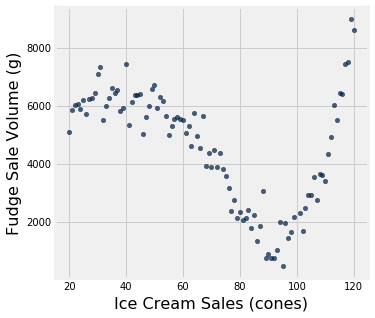

In [4]:
tbl.scatter(0, 1)

What, roughly, would we expect $Fudge\ Sales\ Volume$ to equal provided that $Ice\ Cream\ Sales = 100$?

In [ ]:
# Given Ice Cream := 100, what do we expect Fudge to equal?

```
About 2000.
```

Let's focus on our justification for coming up with a value for $Fudge$.  We saw a strong *relationship* between $Ice \ Cream$ and $Fudge$.  What does that mean?

If we're speaking statistically, then we consider `relationship == association`.  And an association really boils down to the following claim:  

<center>"When this changes value, then that changes value too."</center>

Recall our first lecture where we looked at the potential association between chocolate comsumption and heart disease.  The figures were as follows:  

|Chocolate Consumption|% Developed Cardiovascular Disease|
|---|---|
|Top-tier consumers|12%|
|Chocolate abstainers|17.4%|

If I recall correctly, this exhibited a pretty even split between people saying that there was an association between chocolate consumption and heart disease, that there wasn't, and that it was impossible to tell.

Looking at it now, what do you think?

```
I think there is an association between chocolate consumption and heart disease.

BECAUSE, when the level of consumption changes, the rate of disease changes.
```

Even though we hadn't learned about it yet, in our minds we might have been thinking of something else that's a little bit different than just whether or not a relationship (association) exists.  Perhaps, we were thinking about correlation.

# Correlation
---

What does correlation (or the correlation coefficient) tell us?

```
Correlation tells us how LINEAR the relationship between x and y is.
```

Correlation can be positive or negative, and it can be perfect, strong, moderate, weak, or zero.  We can also quantify it using the correlation coefficient, $r$.

So, going back to our table of $x$ and $y$ above, what correlation do we see?  What about for $Ice\ Cream$ and $Fudge$?

In [ ]:
# What is the correlation (qualitatively) between x and y?

```
x and y have a perfect positive correlation.
```

In [ ]:
# Ice Cream and Fudge are strongly associated.
# What is the correlation between Ice Cream and Fudge?  Is it a strong correlation?

```
There is NOT a strong correlation, because the relationship between Ice Cream and Fudge is NOT linear!
```

So, how do we go about measuring the correlation (finding the correlation coefficient)?

We must first put our x and y values into *"standard units"*.  Recall, to put a point into standard units, what formula is used?

In [ ]:
# First, what does it mean (in words) for something a point to be `n` in standard units?

```
The point is n standard deviations away from the mean.
```

For some data set, $X$, let $x_i = some\ datapoint\ in\ X$

Then, 
$$x_{i, SU} = \frac{x_i - mean(X)}{std(X)}$$

And, replacing $x_i$ with all of our datapoints, $X$, we can convert the entire data set into standard units.

In [ ]:
# Before we convert Ice Cream and Fudge to SU, what do we know about what the scatter plot
# will look like after converting both?

```
The shape will remain the same.
```

In [5]:
# Let's write a quick standard units function
def standard_units(array):
    return (array - np.mean(array)) / np.std(array)

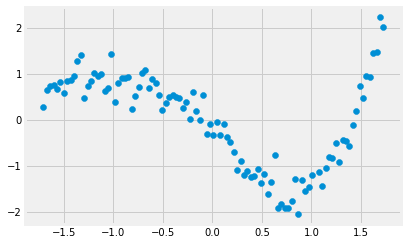

In [6]:
ice_su = standard_units(ice)
fudge_su = standard_units(fudge)

plt.scatter(ice_su, fudge_su)

In [ ]:
# What changed between the two plots?

```
The units have changed.
```

Out of curiosity, what do you expect the mean and standard deviation of $Ice\ Cream_{SU}$ to be?  What about $Fudge_{SU}$?

In [7]:
np.mean(ice_su)

-9.769962616701378e-17

In [8]:
np.std(ice_su)

1.0

Now, to find our correlation coefficient between two data sets, $X$ and $Y$, there is one more formula.  It's written as?

$$r = mean[X_{SU} * Y_{SU}]$$

In [9]:
# Calculate the correlation coefficient between a and b

r = np.mean(ice_su * fudge_su)
r

-0.4709721009919221

Recalling what the correlation between two data sets tells us, what does this really mean?

In [ ]:
# In words, what does our correlation coefficient mean?

```
There's a moderate negative linear relationship between Ice Cream Sales and Fudge Sales.
```

# Onwards, to regression!
---

So, we have a correlation coefficient now.  What can we do with it?

One idea is to plot it somehow.  But how?

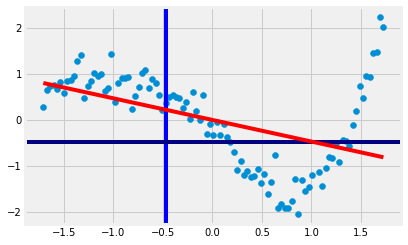

In [15]:
# Let's try incorporating the correlation coefficient into our plot

plt.scatter(ice_su, fudge_su)
plt.axvline(r, c='b')
plt.axhline(r, c='navy')
xrange = np.linspace(min(ice_su), max(ice_su), 2)
plt.plot(xrange, r * xrange, c='r')

In [ ]:
# Now that we've incorporated r into our plot, what does r represent?

```
It's the best linear relationship between Ice Cream and Fudge that we've got.
```

And that's the premise of linear regression!

So, before we go much further, let's figure something out: *What is the purpose of regression?*

Well, it's very useful since it can help us **predict** a value when given an input.  Even if we don't have a data point we can still predict what the corresponding value would be.

We've been looking just at linear regression—stuff that falls in a line—but the same concepts carry over to higher powers!

How about we take a look at some data that's a bit more linear?  Take a look at the plot of $Ice\ Cream\ Sales$ vs $Shark\ Attacks$.

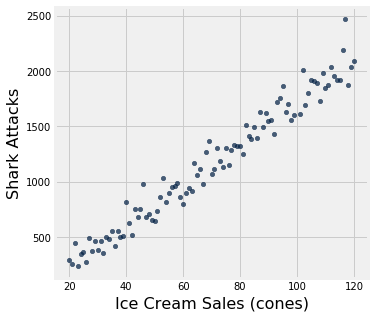

In [16]:
tbl.scatter(0, 2)

Okay, let's find the correlation coefficient so that we can plot a best fit line.

In [ ]:
# Before calculating anything, what do you think the correlation coefficient should be?

```
There's a very strong positive correlation between Ice Cream and Sharks.

It looks like the slope of the best fit line would be about 20.

But, 20 is not a valid value of the correlation coefficient!
```

In [17]:
# We can use the standard_units function we created
ice_su = standard_units(ice)
shark_su = standard_units(shark)

r = np.mean(ice_su * shark_su)
r

0.9808527710561902

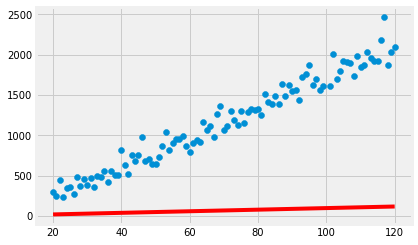

In [18]:
# Let's plot it!

xrange = np.linspace(min(ice), max(ice), 2)

plt.scatter(ice, shark)
plt.plot(xrange, xrange * r, c='r')

Uh-oh.  What's wrong with that plot?

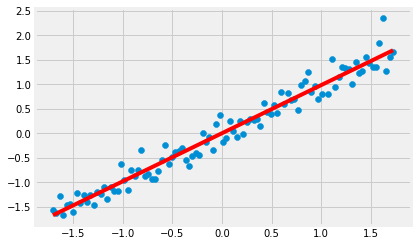

In [19]:
# Let's fix the plot

xrange = np.linspace(min(ice_su), max(ice_su), 2)
plt.scatter(ice_su, shark_su)
plt.plot(xrange, xrange * r, c='r')

In [ ]:
# What is the equation of the line we plotted?

$$y = r \cdot x$$

Cool.  I'm glad we fixed that plot.  We should be able to plug in values into our best-fit line now.  But I'm not really satisfied with the plot we ended up creating.

In [ ]:
# Why am I sad?

























```
It's still in standard units!
```

Let's go ahead and solve that problem.

In order to come up with an equation for the best-fit line in original units (not standard units), what needs to be done?

Well, let's examine what we'd need to change.  For starters, the best-fit line in standard units passes through (0, 0).  Second of all, it has a different slope than what we'd expect.

In standard units, we have $y = rx$.  We want to put this back into original units as the form $y=mx+b$.

$$m = r\cdot \frac{SD_y}{SD_x}$$

$$b = mean_y - m\cdot mean_x$$

In [ ]:
# Let's derive this


$$y_{SU} = r\cdot x_{SU}$$

$$\frac{y - mean_y}{SD_y} = r\cdot \frac{x-mean_x}{SD_x}$$

$$\hspace{2.85cm} y-mean_y = r\cdot \frac{1}{SD_x} \cdot (x-mean_x) \cdot SD_y$$

$$\hspace{1.6cm} y-mean_y = \frac{r\cdot SD_y}{SD_x} \cdot (x-mean_x)$$

$$\hspace{2.45cm} y-mean_y = \frac{r\cdot SD_y}{SD_x}x - \frac{r\cdot SD_y}{SD_x}mean_x$$

$$\hspace{6.2cm} y = \frac{r\cdot SD_y}{SD_x}x - (mean_y - \frac{r\cdot SD_y}{SD_x}mean_x)$$


Great, so let's get our line into original units.  Then, we can start predicting values!

In [20]:
# Write the euqation of the best-fit line between
# Ice Cream and Shark Attacks in original units.

slope = r * (np.std(shark) / np.std(ice))
intercept = np.mean(shark) - slope * np.mean(ice)

"Shark Attacks = {} Ice Cream Sales (cones) + {}".format(slope, intercept)

'Shark Attacks = 18.743829246182646 Ice Cream Sales (cones) + -141.1248984589306'

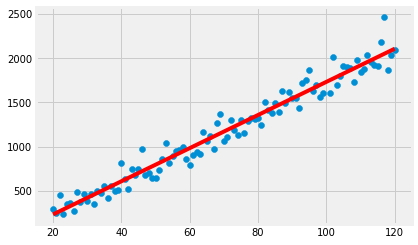

In [21]:
# And plot it out
xrange = np.linspace(min(ice), max(ice), 2)

plt.scatter(ice, shark)
plt.plot(xrange, slope * xrange + intercept, c='r')

In [22]:
# Alright, now, given an Ice Cream value of 100,
# what do we expect the corresponding Shark attack value to be?

value = slope * 100 + intercept
value

1733.258026159334

In [23]:
# What if Ice Cream has a value of 0?

value = slope * 0 + intercept
value

-141.1248984589306

```
It's impossible to have negative shark attacks!!!

This data point is not contained in our data –– it's extrapolation –– so, we need be careful about interpreting it.
```

In [ ]:
# Interpret the best-fit line equation in words

```
For every unit increase in Ice Cream Sales, the number of Shark Attacks increases by about 18.7.  This has a start point of about -141.1 when Ice Cream Sales is zero.
```

# And residuals
---


A residual is defined as the actual y value minus the predicted y value.  This is often written as $y-\hat{y}$

Let's take a look at our residuals for $Ice\ Cream$ and $Shark\ Attacks$, and then look at our residuals for $Ice\ Cream$ and $Fudge\ Sales$.

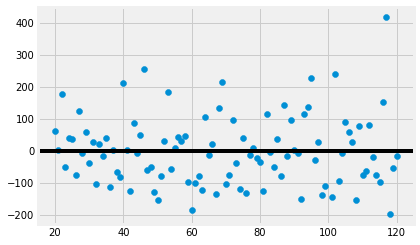

In [24]:
resids_ice_shark = shark - (slope * ice + intercept)

plt.scatter(ice, resids_ice_shark)

# Let's draw a handy line at y=0 (spot on prediction!)
plt.axhline(0, c='k')

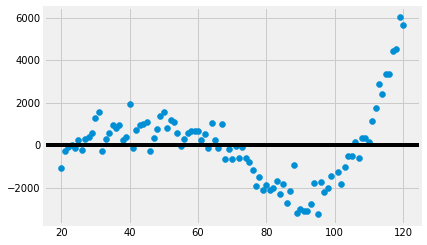

In [25]:
# Getting the best-fit line for ice cream and fudge sales.
corr_ice_fudge = np.mean(ice_su * fudge_su)
slope_ice_fudge = corr_ice_fudge * np.std(fudge) / np.std(ice)
int_ice_fudge = np.mean(fudge) - slope_ice_fudge * np.mean(ice)

# Calculating the residuals here
resids_ice_fudge = fudge - (slope_ice_fudge * ice + int_ice_fudge)

plt.scatter(ice, resids_ice_fudge)
plt.axhline(0, c='k')

In order for our "best-fit" to actually be even a *good* fit, there's a key feature of the residual plot that we should observe.

In [ ]:
# What needs to be true about our residual plot for our best-fit to be good?

```
There should be no patterns in the residual plot.  It should be random (and centered around zero).
```

Out of curiosity, what should the mean of the residual plot be?

In [26]:
np.mean(resids_ice_fudge), np.mean(resids_ice_shark)

(-1.0913936421275138e-13, 1.9838353182421998e-13)

What about the standard deviation?  Which do we expect has a higher SD, the residual plot for Ice Cream and Fudge or for Ice Cream and Sharks?

In [27]:
np.std(resids_ice_fudge), np.std(resids_ice_shark)

(1758.8690065922972, 108.46565530615608)

In [ ]:
# Why is this the case?

```
The two data sets are scaled differently (the units have different ranges).
```

# Ice Cream &Rightarrow; Shark Attacks?
---

Well, we've done it!  We've figured out that there's a very strong positive correlation between ice cream sales and shark attacks.  Does this mean that ice cream sales cause increased shark attacks?

In [ ]:
# Does the strong correlation imply that Ice Cream Sales causes increase shark attacks?

```
Correlation does not imply causation!
```

# Bonus!
---
In addition to the correlation coefficient, $r$, there is also a *"coefficient of determination"*, $r^2$, which is defined as:
> The proportion of the variance in the dependent variable that explained by the best-fit line.

Let's interpret it in terms of Ice Cream Sales and Shark Attacks!

In [28]:
# Interpret (in words) the coefficient of determination

r2 = r**2
r2

0.962072158488607

```
About 96% of the variation in shark attacks can be explained by the best-fit line between ice cream sales and shark attacks.
```

# Thank you for a great quarter!
### Final Review on Sunday 12/09, 4p–5:30p, Center 115
### TA Evaluations are open
### Best of luck with your future endeavors :')